In [1]:
import numpy as np

In [2]:
import pandas as pd

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [61]:
df=pd.read_csv('happiness_score_dataset.csv')

In [95]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [63]:
df.keys()

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [64]:
#Checking for any missing data 
df.isnull().any()

Country                          False
Region                           False
Happiness Rank                   False
Happiness Score                  False
Standard Error                   False
Economy (GDP per Capita)         False
Family                           False
Health (Life Expectancy)         False
Freedom                          False
Trust (Government Corruption)    False
Generosity                       False
Dystopia Residual                False
dtype: bool

In [13]:
#Defining an empty dataframe to fill up later with evaluation metrics

In [14]:
evaluation = pd.DataFrame({'Model':[],
                          'Details':[],
                          'Root Mean Squared Error (RMSE)': [],
                          'R-squared (training)': [],
                          'Adjusted R-squared (training)': [],
                          'R-squared (test)':[],
                          'Adjusted R-squared(test)':[],
                           '5-Fold Cross Validation':[]
                        })

In [15]:
#To see the relationship between various features and the happiness score

In [76]:
#Relationship between GDP and Happiness score
x=df['Economy (GDP per Capita)']

y=df['Happiness Score']


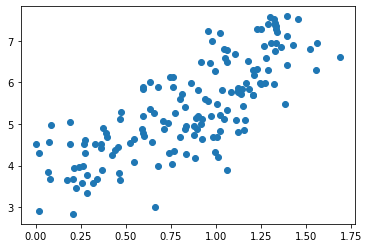

In [77]:
plt.scatter(x,y)

In [ ]:
#Relationship between Family and Happiness score
x=df['Family']

y=df['Happiness Score']

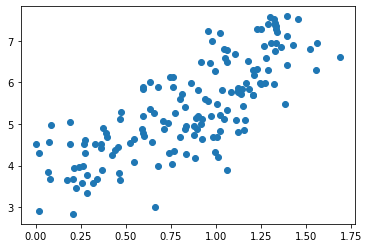

In [78]:
plt.scatter(x,y)

In [79]:
#Relationship between Health (Life Expectancy) and Happiness score

x=df['Health (Life Expectancy)']

y=df['Happiness Score']

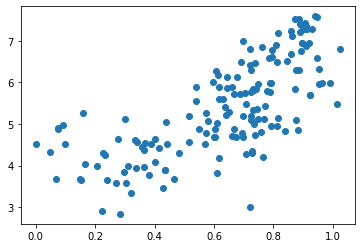

In [80]:
plt.scatter(x,y)

In [81]:
#Relationship between Freedom and Happiness score

x=df['Freedom']

y=df['Happiness Score']

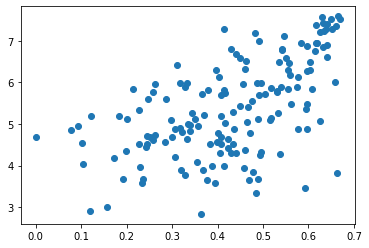

In [83]:
plt.scatter(x,y)

In [84]:
#Relationship between Trust (Government Corruption) and Happiness score
x=df['Trust (Government Corruption)']
y=df['Happiness Score']


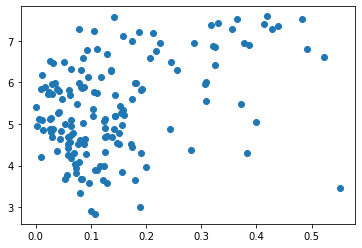

In [85]:
plt.scatter(x,y)

In [87]:
#Relationship between Generosity and Happiness score
x=df['Generosity']
y=df['Happiness Score']

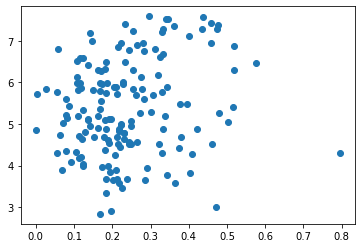

In [88]:
plt.scatter(x,y)

In [89]:
#By having the scatter plot visualised it shows that the relationship is quite linear with all the features and hence going for the linear model

df.shape

(158, 12)

In [114]:
x=df.iloc[:,3:]

In [115]:
x.shape

(158, 9)

In [116]:
x.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [99]:
y=df.iloc[:,-9]

In [100]:
y.shape

(158,)

In [101]:
y.head()

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64

In [117]:
#Choosing a random state
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [118]:
x_train.shape

(105, 9)

In [119]:
y_train.shape

(105,)

In [120]:
x_test.shape

(53, 9)

In [121]:
y_test.shape

(53,)

In [122]:
lm=LinearRegression()

In [123]:
lm.fit(x_train,y_train)

LinearRegression()

In [124]:
lm.coef_

array([1.00000000e+00, 2.97915881e-15, 6.23264551e-15, 5.89015236e-15,
       5.95938356e-15, 5.70407304e-15, 5.42132615e-15, 7.45429574e-15,
       6.22638043e-15])

In [125]:
lm.intercept_

0.0

In [126]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [127]:
lm.score(x_train,y_train)

1.0

In [128]:
pred=lm.predict(x_test)

In [130]:
print(" happiness predictions",pred)

 happiness predictions [4.307 5.987 4.194 2.905 5.057 6.574 4.898 4.876 4.949 3.931 6.901 5.828
 6.983 5.548 6.786 6.505 4.507 4.686 4.971 5.695 3.655 6.937 7.2   7.284
 6.485 5.192 5.889 3.956 4.369 3.681 3.781 5.332 3.995 5.833 4.35  5.129
 3.34  6.123 5.605 4.55  6.67  4.033 5.253 3.656 6.302 5.286 6.81  4.218
 3.904 7.226 5.212 5.589 4.436]


In [131]:
print("actual predictions",y_test)

actual predictions 128    4.307
45     5.987
134    4.194
156    2.905
90     5.057
29     6.574
96     4.898
98     4.876
95     4.949
140    3.931
19     6.901
56     5.828
15     6.983
69     5.548
24     6.786
30     6.505
122    4.507
109    4.686
93     4.971
65     5.695
150    3.655
18     6.937
12     7.200
9      7.284
31     6.485
81     5.192
51     5.889
139    3.956
125    4.369
146    3.681
145    3.781
75     5.332
137    3.995
55     5.833
126    4.350
84     5.129
154    3.340
42     6.123
67     5.605
117    4.550
26     6.670
136    4.033
78     5.253
149    3.656
36     6.302
76     5.286
22     6.810
133    4.218
141    3.904
11     7.226
79     5.212
68     5.589
123    4.436
Name: Happiness Score, dtype: float64


In [132]:
print("mean absolute error is ",mean_absolute_error(y_test,pred))

mean absolute error is  6.954604607085887e-16


In [133]:
print("mean squared error",mean_squared_error(y_test,pred))

mean squared error 8.297923672843661e-31


In [134]:
print("root of squared root error is",np.sqrt(mean_squared_error(y_test,pred)))

root of squared root error is 9.109293975299985e-16


In [135]:
from sklearn.metrics import r2_score

In [136]:
print(r2_score(y_test,pred))

1.0


In [137]:
from sklearn.linear_model import Lasso,Ridge

In [138]:
ls=Lasso(alpha=0.001)

In [139]:
ls.fit(x_train,y_train)

Lasso(alpha=0.001)

In [140]:
ls.score(x_train,y_train)

0.9999993843472863

In [141]:
ls.coef_

array([ 0.99921536, -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])